<a href="https://colab.research.google.com/github/TasdidurRahman/Customer_Segmentation_using_Machine_Learning_in_R/blob/main/Customer_Segmentation_using_Machine_Learning_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initialization

In [1]:
customer_data=read.csv("/content/sample_data/Mall_Customers.csv")
str(customer_data)
names(customer_data)

'data.frame':	200 obs. of  5 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                : chr  "Male" "Male" "Female" "Female" ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


[1] "CustomerID"             "Gender"                 "Age"                   
[4] "Annual.Income..k.."     "Spending.Score..1.100."

In [2]:
head(customer_data)
summary(customer_data$Age)

,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<chr>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

In [3]:
sd(customer_data$Age)
summary(customer_data$Annual.Income..k..)
sd(customer_data$Annual.Income..k..)
summary(customer_data$Age)

[1] 13.96901

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

[1] 26.26472

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

In [4]:
sd(customer_data$Spending.Score..1.100.)

[1] 25.82352

#Customer Gender Visualization

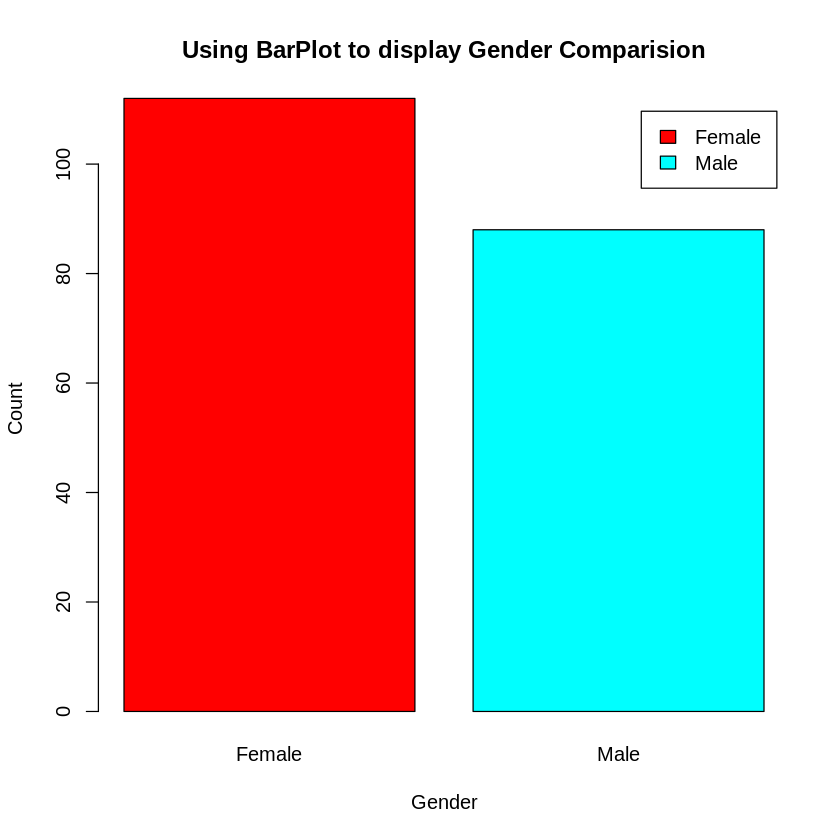

In [5]:
a=table(customer_data$Gender)
barplot(a,main="Using BarPlot to display Gender Comparision",
       ylab="Count",
       xlab="Gender",
       col=rainbow(2),
       legend=rownames(a))

In [8]:
install.packages("plotrix")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



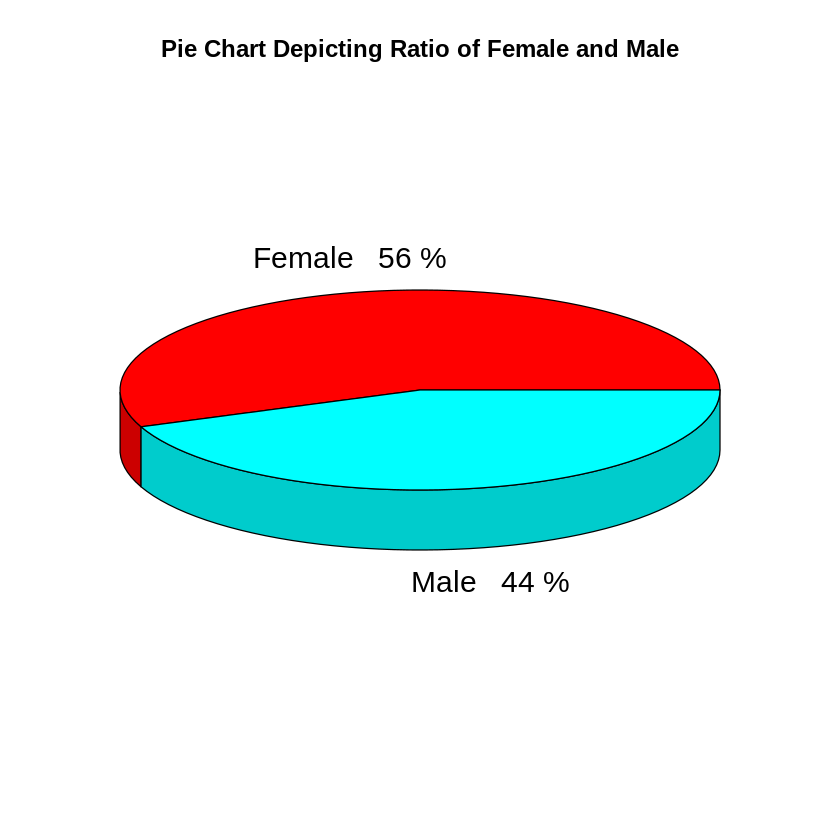

In [9]:
pct=round(a/sum(a)*100)
lbs=paste(c("Female","Male")," ",pct,"%",sep=" ")
library(plotrix)
pie3D(a,labels=lbs,
   main="Pie Chart Depicting Ratio of Female and Male")

#Visualization of Age Distribution


In [10]:
summary(customer_data$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

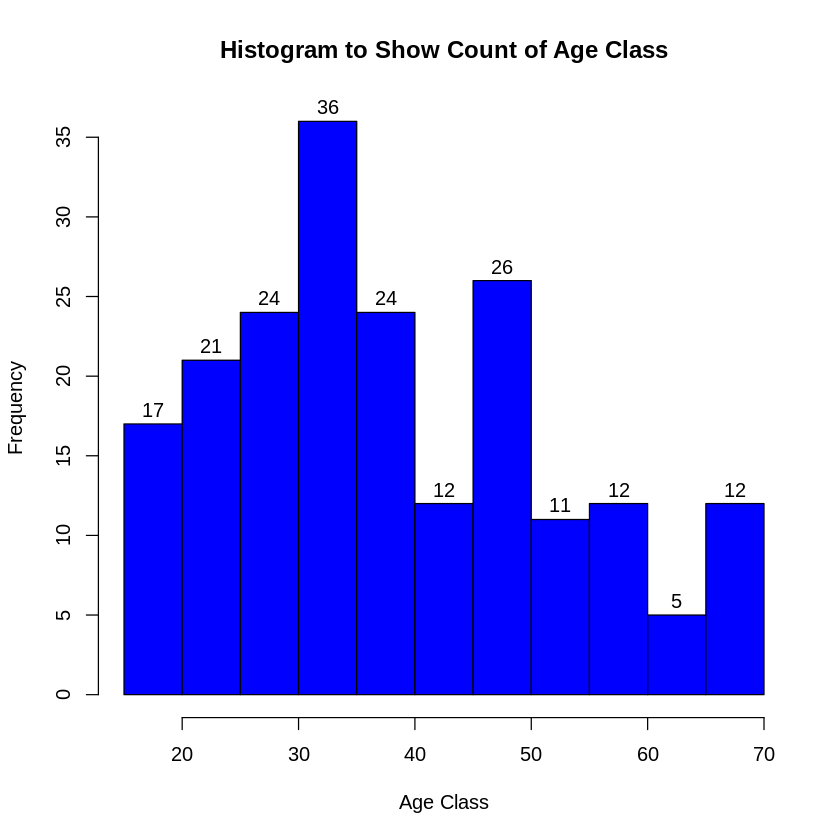

In [11]:
hist(customer_data$Age,
    col="blue",
    main="Histogram to Show Count of Age Class",
    xlab="Age Class",
    ylab="Frequency",
    labels=TRUE)

In [ ]:
boxplot(customer_data$Age,
       col="ff0066",
       main="Boxplot for Descriptive Analysis of Age")

#Analysis of the Annual Income of the Customers


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

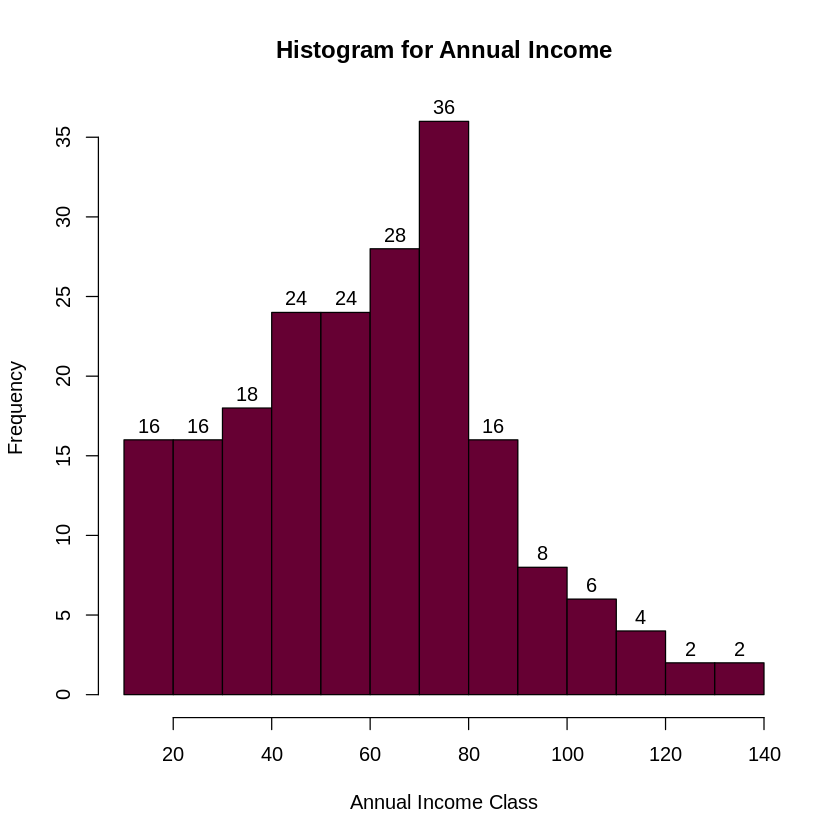

In [13]:
summary(customer_data$Annual.Income..k..)
hist(customer_data$Annual.Income..k..,
  col="#660033",
  main="Histogram for Annual Income",
  xlab="Annual Income Class",
  ylab="Frequency",
  labels=TRUE)

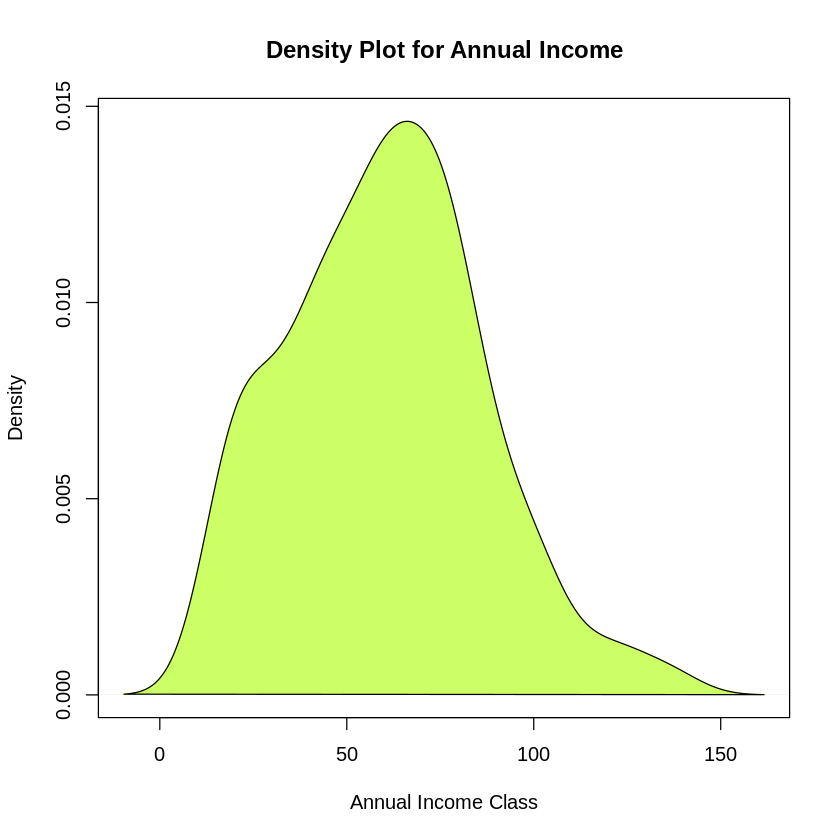

In [14]:
plot(density(customer_data$Annual.Income..k..),
    col="yellow",
    main="Density Plot for Annual Income",
    xlab="Annual Income Class",
    ylab="Density")
polygon(density(customer_data$Annual.Income..k..),
        col="#ccff66")

#Analyzing Spending Score of the Customers


In [17]:
summary(customer_data$Spending.Score..1.100.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   34.75   50.00   50.20   73.00   99.00 

In [ ]:
boxplot(customer_data$Spending.Score..1.100.,
   horizontal=TRUE,
   col="#990000",
   main="BoxPlot for Descriptive Analysis of Spending Score") 

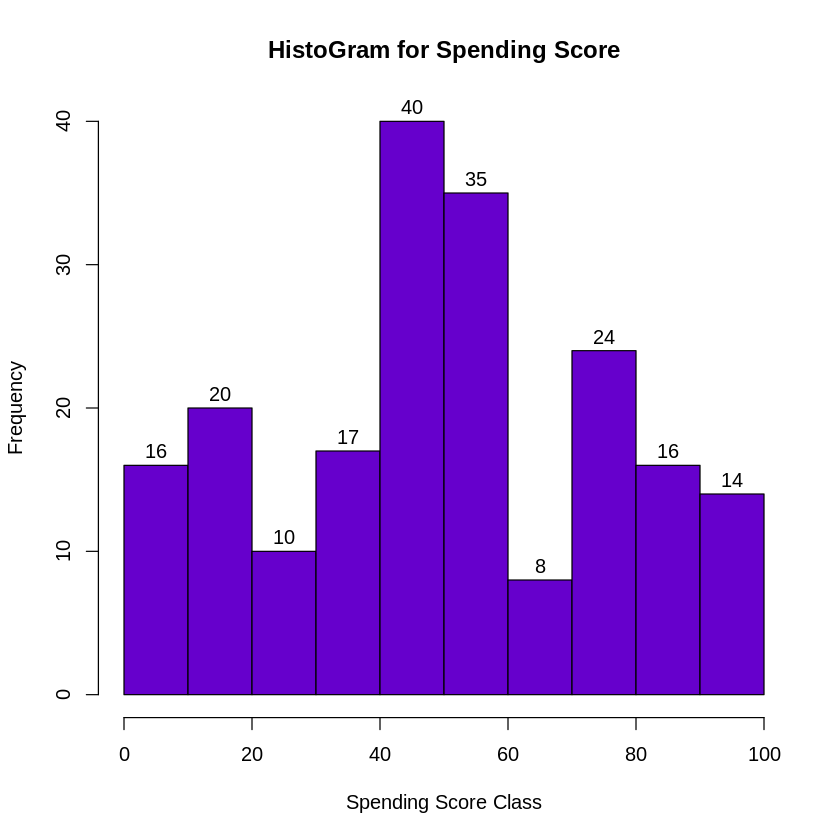

In [18]:
hist(customer_data$Spending.Score..1.100.,
    main="HistoGram for Spending Score",
    xlab="Spending Score Class",
    ylab="Frequency",
    col="#6600cc",
    labels=TRUE)

#K-means Algorithm


##Determining Optimal Clusters


###Elbow Method


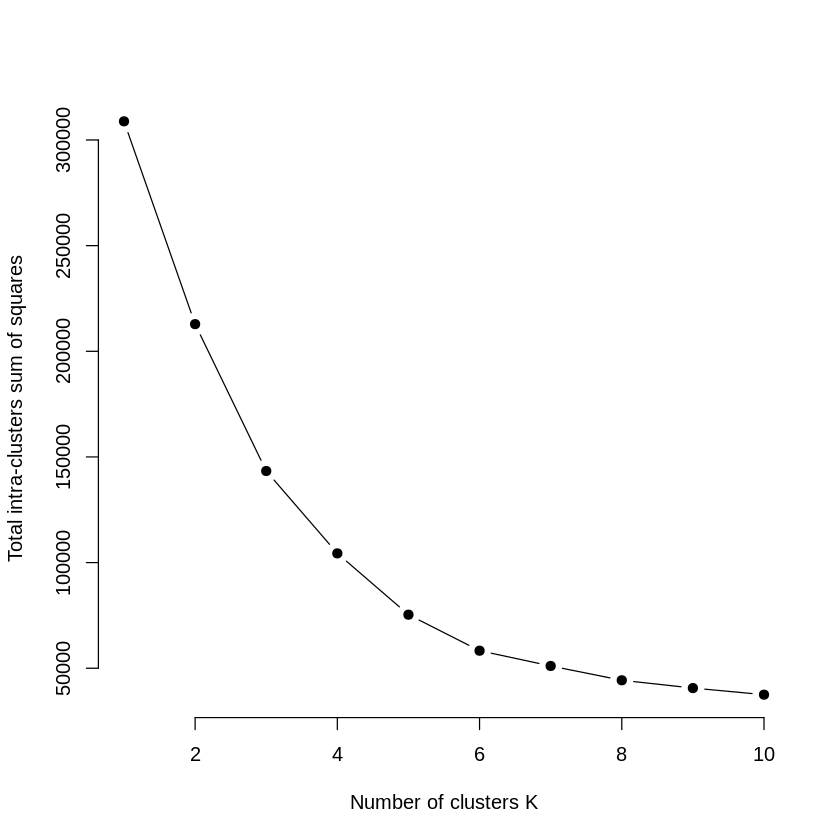

In [19]:
library(purrr)
set.seed(123)
# function to calculate total intra-cluster sum of square 
iss <- function(k) {
  kmeans(customer_data[,3:5],k,iter.max=100,nstart=100,algorithm="Lloyd" )$tot.withinss
}

k.values <- 1:10


iss_values <- map_dbl(k.values, iss)

plot(k.values, iss_values,
    type="b", pch = 19, frame = FALSE, 
    xlab="Number of clusters K",
    ylab="Total intra-clusters sum of squares")

###Average Silhouette Method


In [21]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



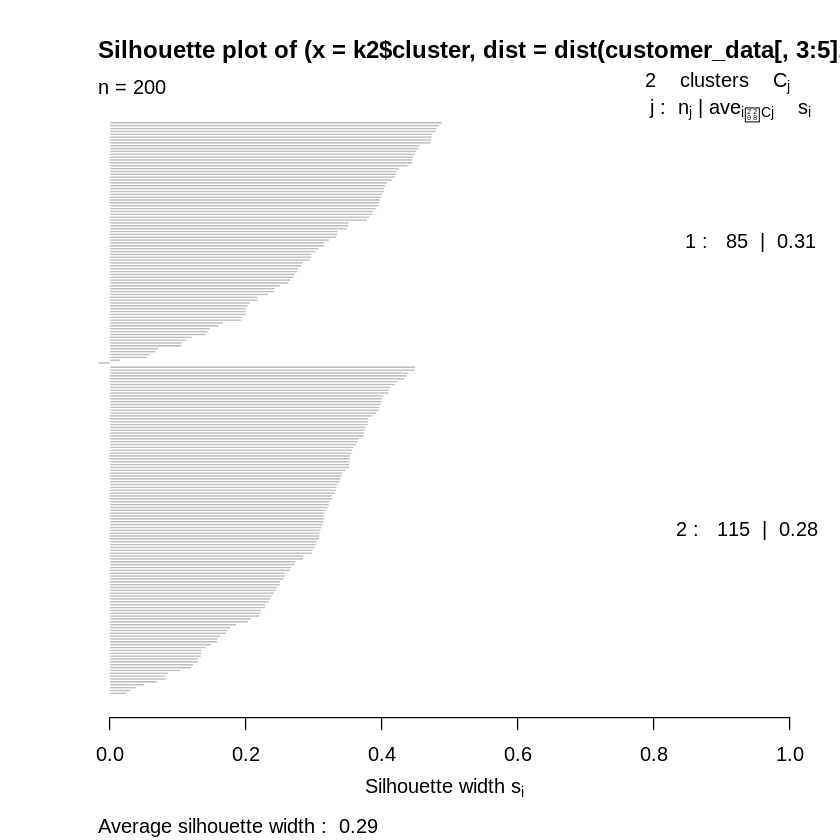

In [22]:
library(cluster) 
library(gridExtra)
library(grid)


k2<-kmeans(customer_data[,3:5],2,iter.max=100,nstart=50,algorithm="Lloyd")
s2<-plot(silhouette(k2$cluster,dist(customer_data[,3:5],"euclidean")))

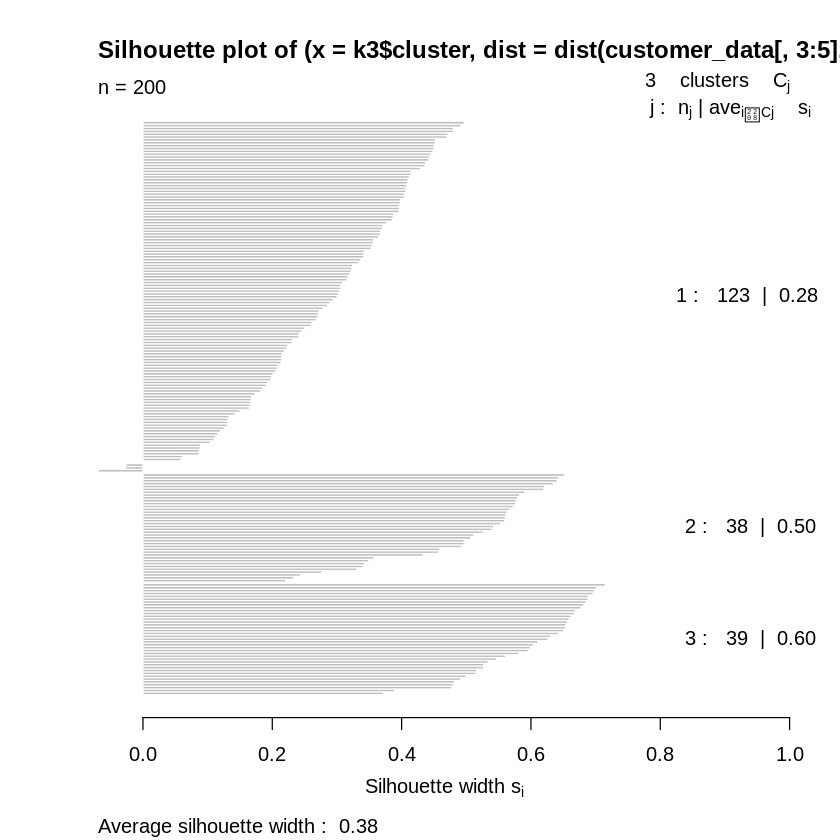

In [23]:
k3<-kmeans(customer_data[,3:5],3,iter.max=100,nstart=50,algorithm="Lloyd")
s3<-plot(silhouette(k3$cluster,dist(customer_data[,3:5],"euclidean")))

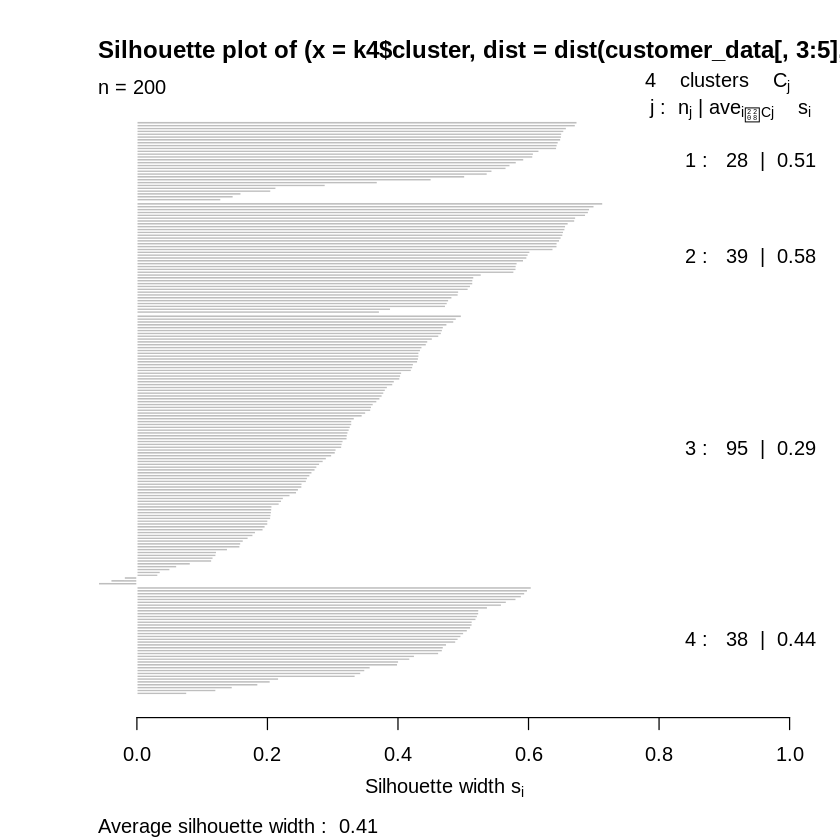

In [24]:
k4<-kmeans(customer_data[,3:5],4,iter.max=100,nstart=50,algorithm="Lloyd")
s4<-plot(silhouette(k4$cluster,dist(customer_data[,3:5],"euclidean")))

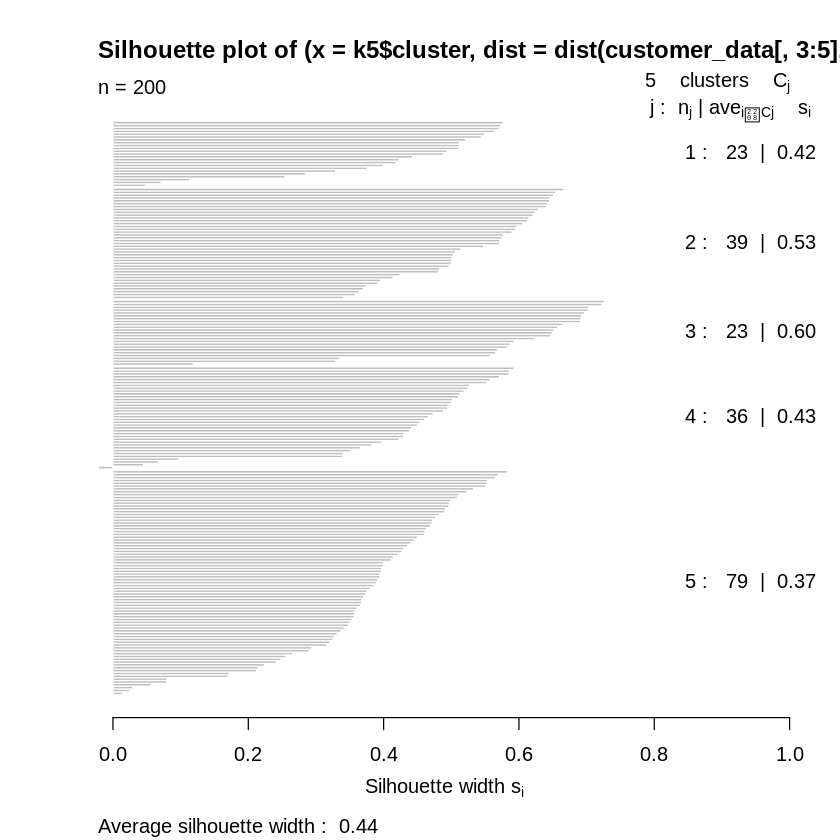

In [25]:
k5<-kmeans(customer_data[,3:5],5,iter.max=100,nstart=50,algorithm="Lloyd")
s5<-plot(silhouette(k5$cluster,dist(customer_data[,3:5],"euclidean")))

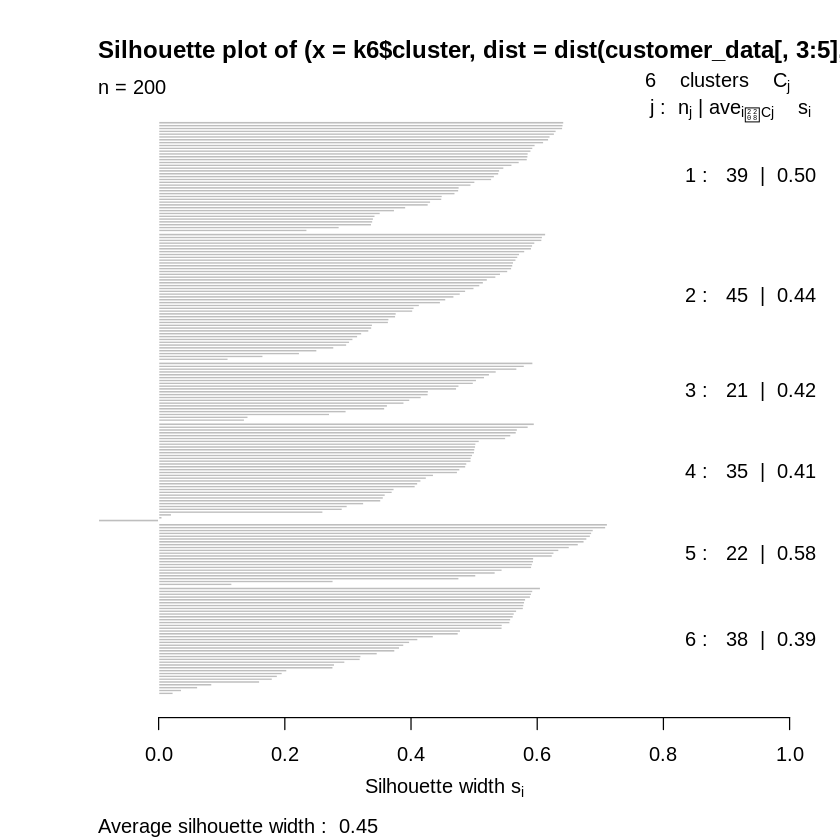

In [26]:
k6<-kmeans(customer_data[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")
s6<-plot(silhouette(k6$cluster,dist(customer_data[,3:5],"euclidean")))

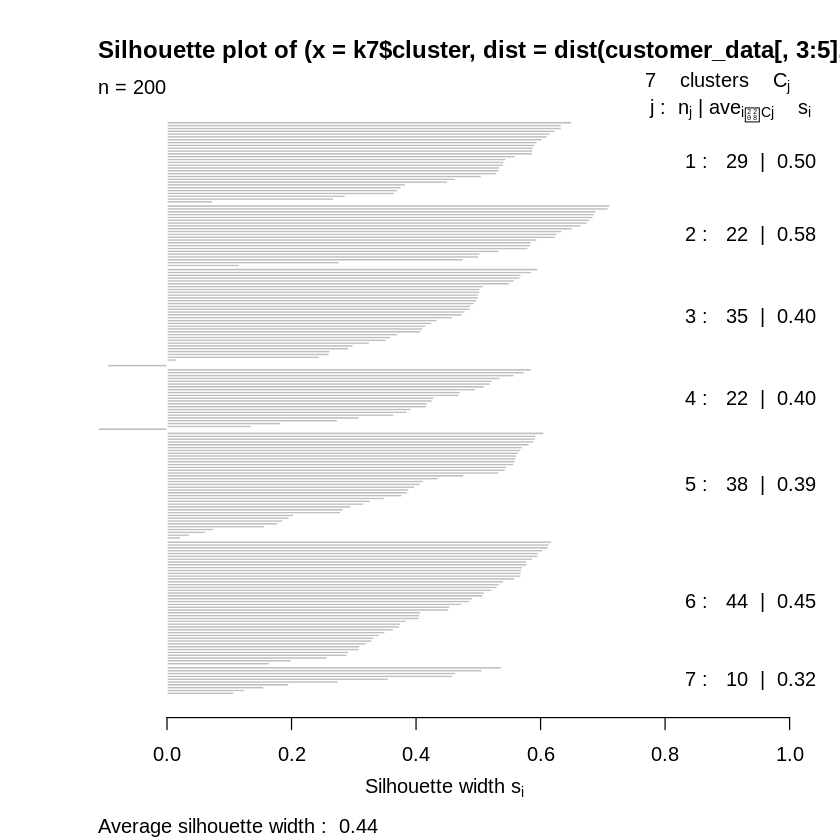

In [27]:
k7<-kmeans(customer_data[,3:5],7,iter.max=100,nstart=50,algorithm="Lloyd")
s7<-plot(silhouette(k7$cluster,dist(customer_data[,3:5],"euclidean")))

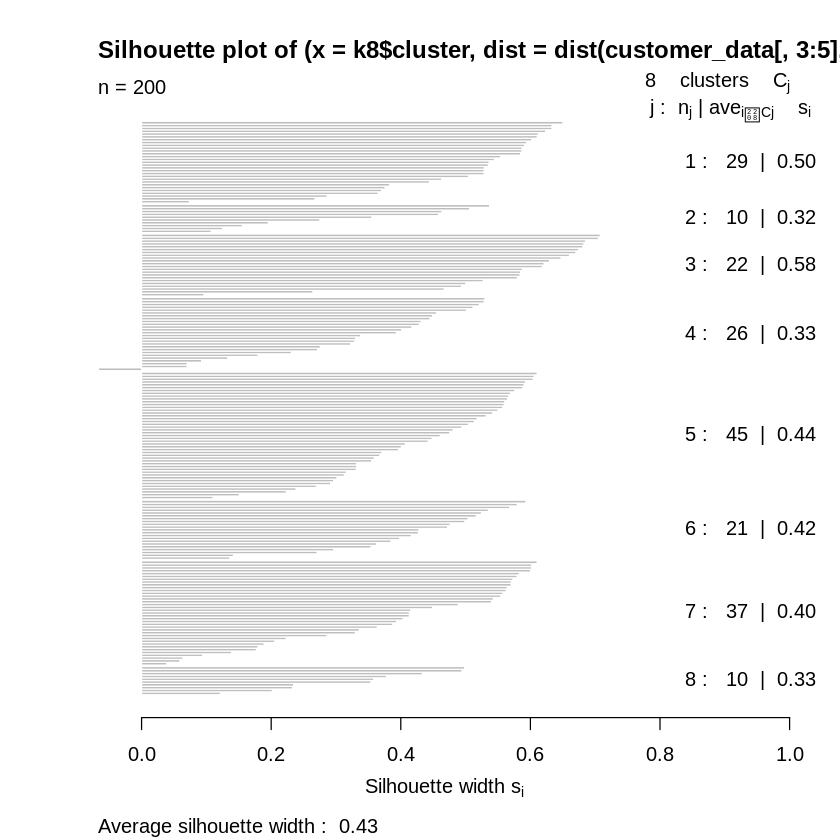

In [28]:
k8<-kmeans(customer_data[,3:5],8,iter.max=100,nstart=50,algorithm="Lloyd")
s8<-plot(silhouette(k8$cluster,dist(customer_data[,3:5],"euclidean")))

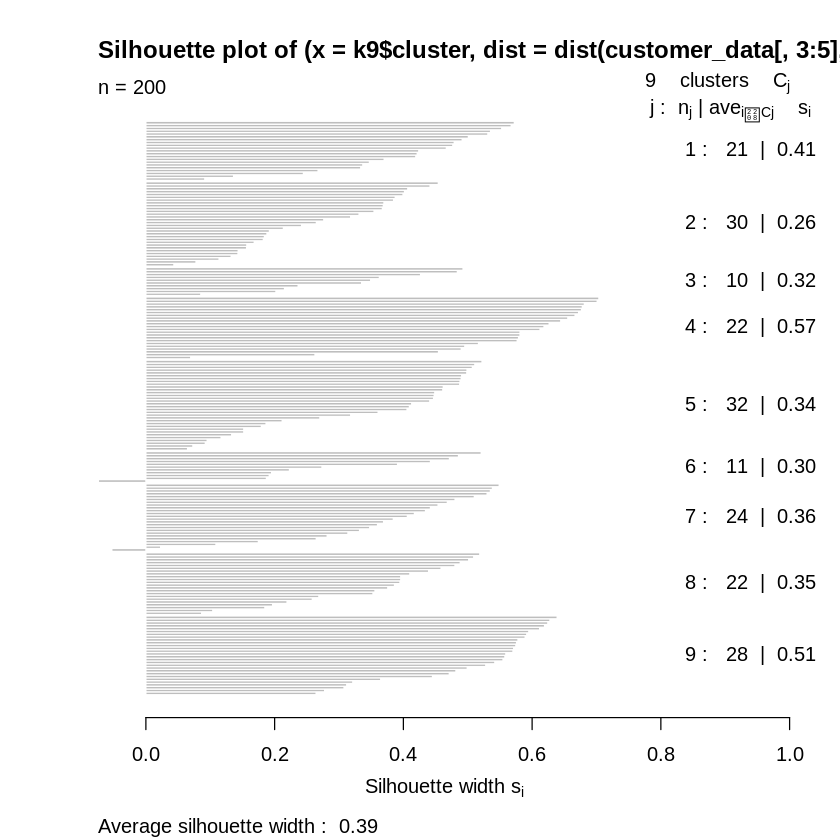

In [29]:
k9<-kmeans(customer_data[,3:5],9,iter.max=100,nstart=50,algorithm="Lloyd")
s9<-plot(silhouette(k9$cluster,dist(customer_data[,3:5],"euclidean")))

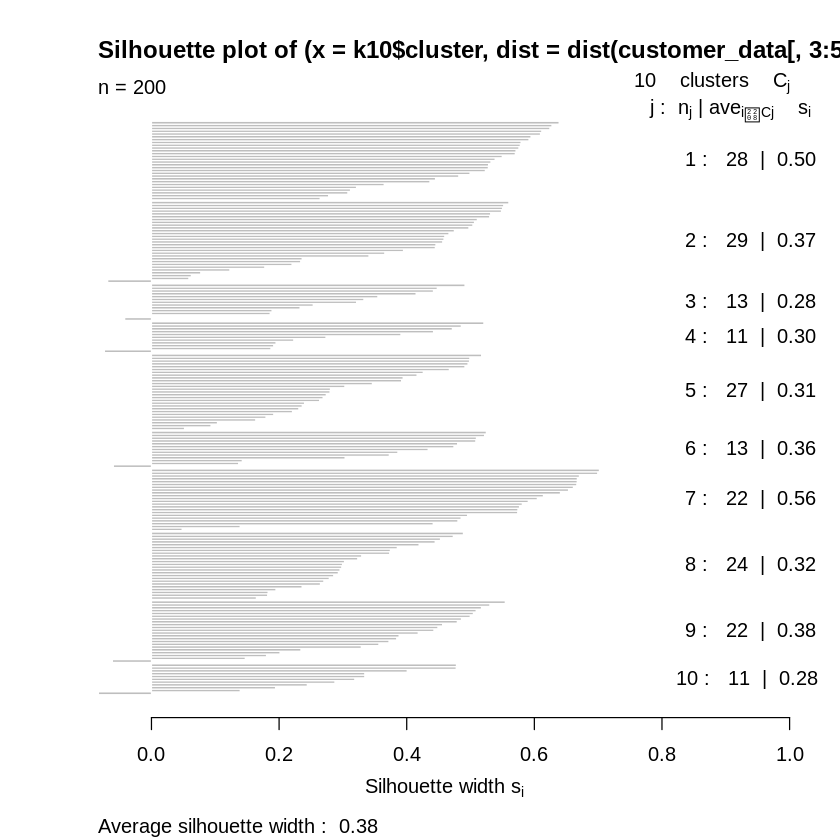

In [30]:
k10<-kmeans(customer_data[,3:5],10,iter.max=100,nstart=50,algorithm="Lloyd")
s10<-plot(silhouette(k10$cluster,dist(customer_data[,3:5],"euclidean")))

In [32]:
install.packages("NbClust")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [34]:
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [36]:
library(NbClust)
library(factoextra)


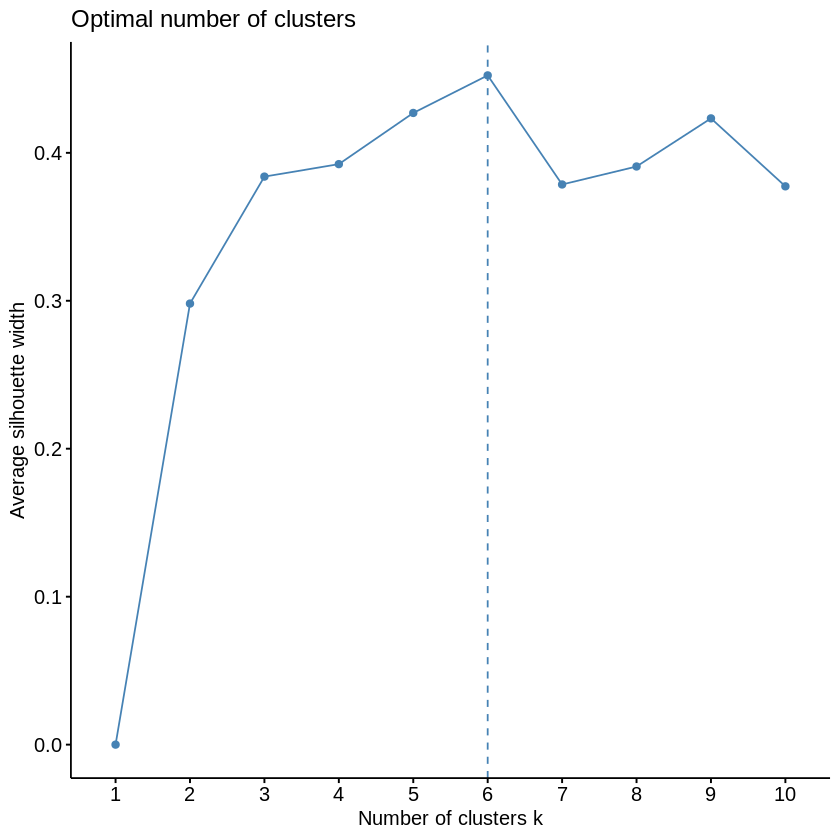

In [37]:

fviz_nbclust(customer_data[,3:5], kmeans, method = "silhouette")

###Gap Statistic Method


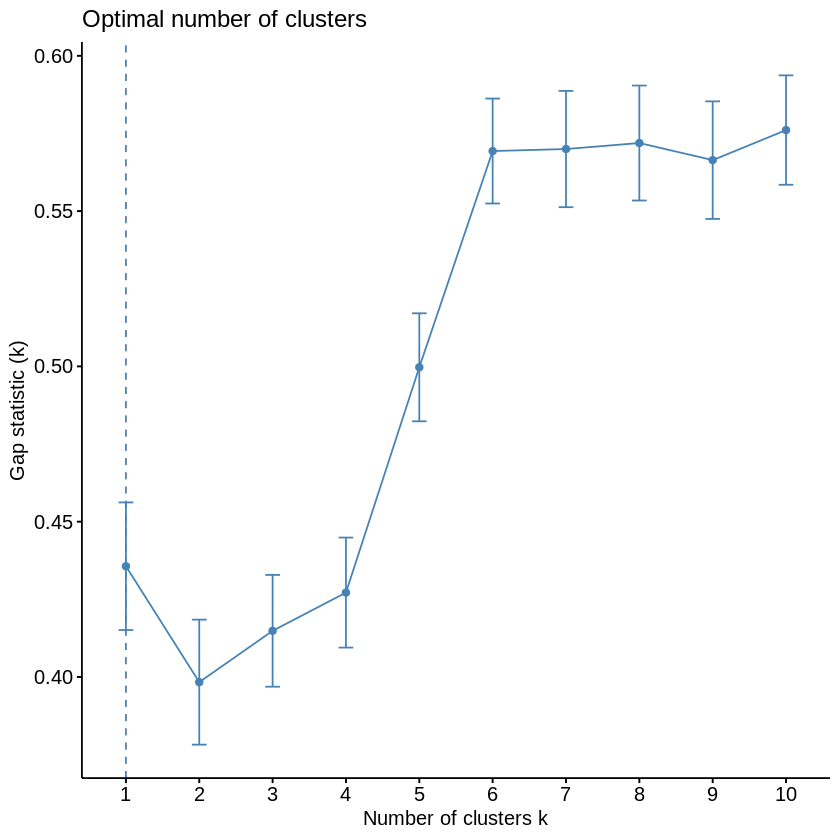

In [38]:
set.seed(125)
stat_gap <- clusGap(customer_data[,3:5], FUN = kmeans, nstart = 25,
            K.max = 10, B = 50)
fviz_gap_stat(stat_gap)

In [39]:
k6<-kmeans(customer_data[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")
k6

K-means clustering with 6 clusters of sizes 45, 22, 21, 38, 35, 39

Cluster means:
       Age Annual.Income..k.. Spending.Score..1.100.
1 56.15556           53.37778               49.08889
2 25.27273           25.72727               79.36364
3 44.14286           25.14286               19.52381
4 27.00000           56.65789               49.13158
5 41.68571           88.22857               17.28571
6 32.69231           86.53846               82.12821

Clustering vector:
  [1] 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 [38] 2 3 2 1 2 1 4 3 2 1 4 4 4 1 4 4 1 1 1 1 1 4 1 1 4 1 1 1 4 1 1 4 4 1 1 1 1
 [75] 1 4 1 4 4 1 1 4 1 1 4 1 1 4 4 1 1 4 1 4 4 4 1 4 1 4 4 1 1 4 1 4 1 1 1 1 1
[112] 4 4 4 4 4 1 1 1 1 4 4 4 6 4 6 5 6 5 6 5 6 4 6 5 6 5 6 5 6 5 6 4 6 5 6 5 6
[149] 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5
[186] 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6

Within cluster sum of squares by cluster:
[1]  8062.133  4099.818  7732.381  7742.895 166

#Visualizing the Clustering Results using the First Two Principle Components

In [41]:
pcclust=prcomp(customer_data[,3:5],scale=FALSE) #principal component analysis
summary(pcclust)


Importance of components:
                           PC1     PC2     PC3
Standard deviation     26.4625 26.1597 12.9317
Proportion of Variance  0.4512  0.4410  0.1078
Cumulative Proportion   0.4512  0.8922  1.0000

In [42]:

pcclust$rotation[,1:2]

,PC1,PC2
Age,0.1889742,-0.1309652
Annual.Income..k..,-0.5886410,-0.8083757
Spending.Score..1.100.,-0.7859965,0.5739136


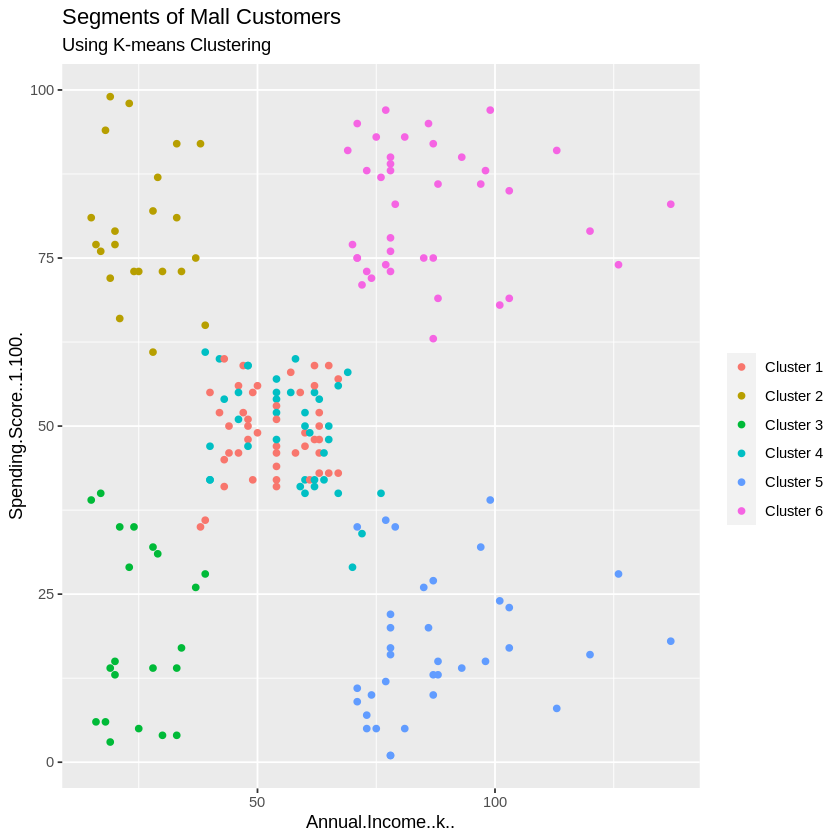

In [43]:
set.seed(1)
ggplot(customer_data, aes(x =Annual.Income..k.., y = Spending.Score..1.100.)) + 
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
              breaks=c("1", "2", "3", "4", "5","6"),
              labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

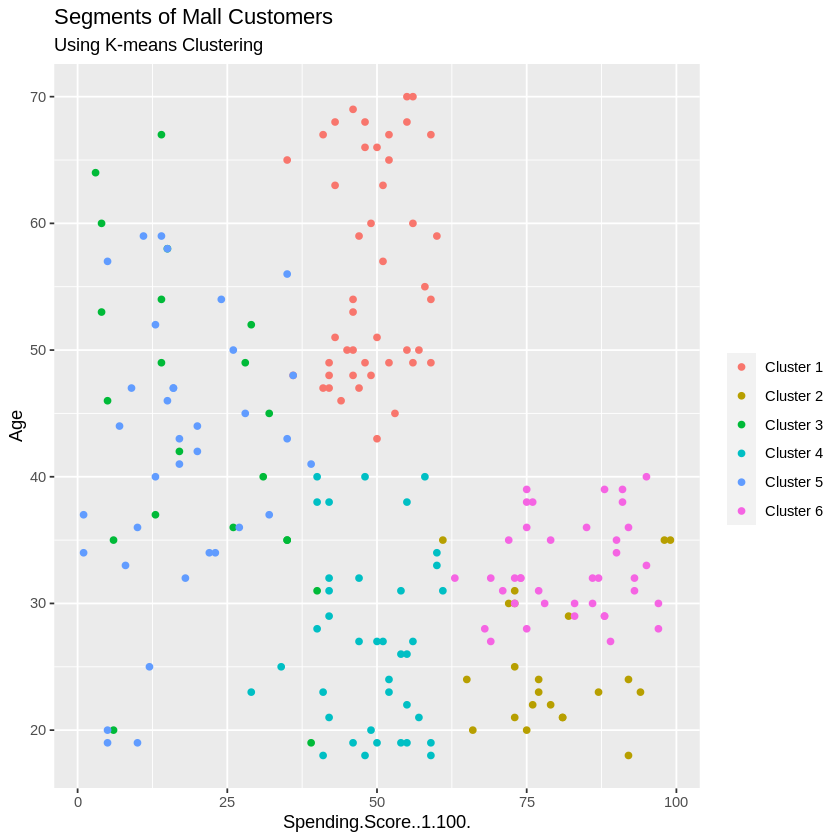

In [44]:
ggplot(customer_data, aes(x =Spending.Score..1.100., y =Age)) + 
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
                      breaks=c("1", "2", "3", "4", "5","6"),
                      labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

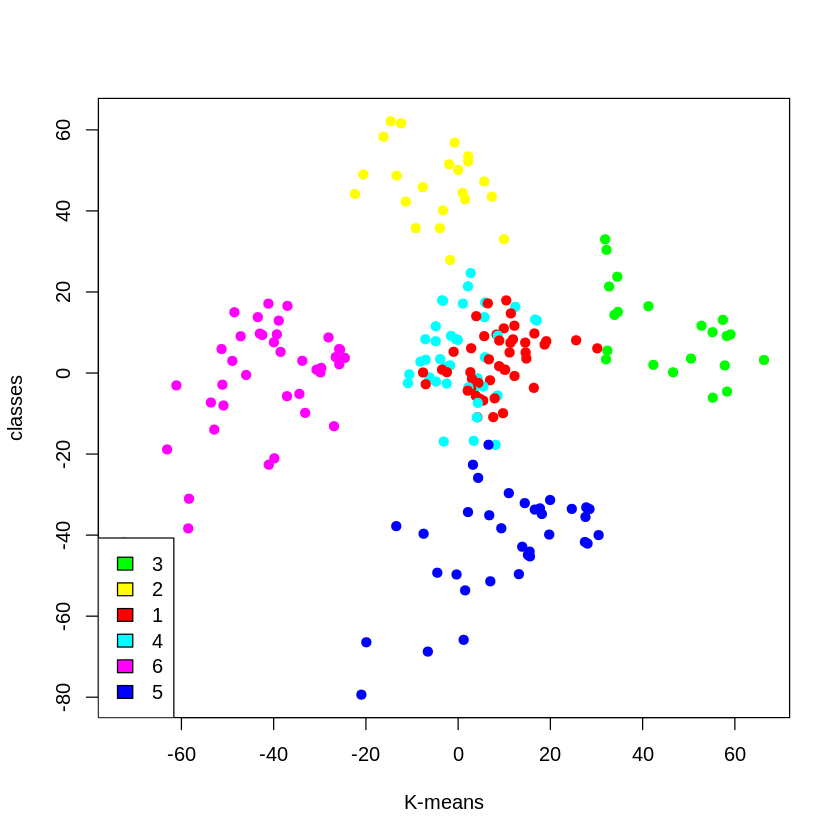

In [45]:
kCols=function(vec){cols=rainbow (length (unique (vec)))
return (cols[as.numeric(as.factor(vec))])}

digCluster<-k6$cluster; dignm<-as.character(digCluster); # K-means clusters

plot(pcclust$x[,1:2], col =kCols(digCluster),pch =19,xlab ="K-means",ylab="classes")
legend("bottomleft",unique(dignm),fill=unique(kCols(digCluster)))